In [2]:
import requests
import json

with open(r"discordBot\auth.json") as auth_file:
    authFile = json.load(auth_file)
    authKey = authFile["API"]

match_key = "2023nyli_f1m3"

zebraData = requests.get(f"https://www.thebluealliance.com/api/v3/match/{match_key}/zebra_motionworks", headers={"X-TBA-Auth-Key": authKey}).json()

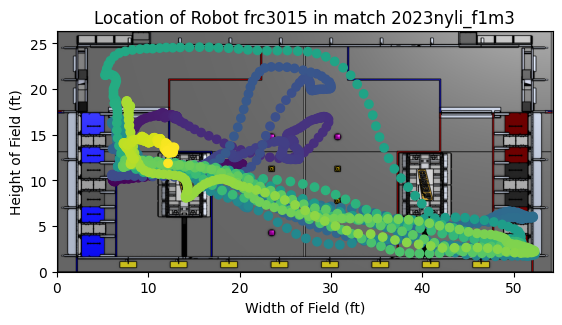

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xRaw = zebraData["alliances"]["red"][2]["xs"]
yRaw = zebraData["alliances"]["red"][2]["ys"]
timesRaw = zebraData["times"]

x, y, times = [], [], []
for i in range(len(xRaw)):
    if xRaw[i] != None:
        x.append(xRaw[i])
        y.append(yRaw[i])
        times.append(timesRaw[i])

heatmap, xedges, yedges = np.histogram2d(x, y, bins=64)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
im = plt.imread("2023_game_field.png")
plt.imshow(im, extent=[0, 54 + 3.25/12, 0, 26 + 3.5/12])
# plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.scatter(x, y, c=times)

plt.xlim(left=0, right=54 + 3.25/12)
plt.ylim(bottom=0, top=26 + 3.5/12)

plt.ylabel("Height of Field (ft)")
plt.xlabel("Width of Field (ft)")
plt.title("Location of Robot " + zebraData["alliances"]["red"][2]["team_key"] + " in match " + zebraData["key"])

plt.show()